# Basic statistics

## Notes

Pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load behavior data

In [2]:
# Directory where data is stored
data_fpath = '/Users/cmcgrory/engel_lab/brainstate_dm/AV_Data_CSHL'

# Path to behavior file (contains data for all subjects/sessions)
behavior_fpath = f'{data_fpath}/behavior.csv'

# Load behavior data for all subjects
df = pd.read_csv(behavior_fpath, header=0, index_col=0)

In [3]:
# Make sure all data comes from auditory blocks ('block' = 0)
df = df[df.block == 0]

# Add columns specifying audio and visual stimulus presence
df['s_audio'] = df.trial_type.map({1.0: False, 2.0: True, 3.0: True, 4.0: False})
df['s_visual'] = df.trial_type.map({1.0: True, 2.0: False, 3.0: True, 4.0: False})

## 3. Response probabilities

### 3.1 For all subjects, sessions

**TODO: Make sure I'm not screwing this calculation up! Average across all subjects and sessions is very different from what I'm seeing with specific sessions**

In [4]:
(df.groupby(['s_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
s_audio s_visual                                   
False   False         9668         2202    0.227762
        True          9529         2172    0.227936
True    False        10853         3717    0.342486
        True         10829         3726    0.344076

In [5]:
(df.groupby('s_audio').agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

,n_trials,n_responses,p_response
s_audio,,,
False,19197,4374,0.227848
True,21682,7443,0.343280


One interesting thing to notice here is that, in the audio block trials, **the average response rate is almost completely determined by the audio stimulus** -- the presence of the visual stimulus has almost no effect. Also, on average, **the mice are very biased against responding**: the response rate when the stimulus is present is only 34%, and the rate when the stimulus is absent is 23%. 

### 3.2 For specific subjects, sessions

#### W2372, S28

In [6]:
df_1 = df.query('subject_id == "W2372" and session_id == 28')

In [7]:
(df_1.groupby(['s_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
s_audio s_visual                                   
False   False          135           80    0.592593
        True            86           60    0.697674
True    False          103          101    0.980583
        True           126          119    0.944444

In [8]:
(df_1.groupby('s_audio').agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

,n_trials,n_responses,p_response
s_audio,,,
False,221,140,0.633484
True,229,220,0.960699


#### W2372, S29

In [9]:
df_2 = df.query('subject_id == "W2372" and session_id == 29')

In [10]:
(df_2.groupby(['s_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
s_audio s_visual                                   
False   False           91           49    0.538462
        True           126           77    0.611111
True    False          128          126    0.984375
        True           133          129    0.969925

In [11]:
(df_2.groupby('s_audio').agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

,n_trials,n_responses,p_response
s_audio,,,
False,217,126,0.580645
True,261,255,0.977011


#### W2402, S09

In [12]:
df_3 = df.query('subject_id == "W2402" and session_id == 9')

In [13]:
(df_3.groupby(['s_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
s_audio s_visual                                   
False   False           92           56    0.608696
        True            91           47    0.516484
True    False          106           90    0.849057
        True            96           83    0.864583

In [14]:
(df_3.groupby('s_audio').agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

,n_trials,n_responses,p_response
s_audio,,,
False,183,103,0.562842
True,202,173,0.856436


#### W2402, S10

In [15]:
df_4 = df.query('subject_id == "W2402" and session_id == 10')

In [16]:
(df_4.groupby(['s_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
s_audio s_visual                                   
False   False           99           44    0.444444
        True            91           42    0.461538
True    False          115          107    0.930435
        True           100           95    0.950000

In [17]:
(df_4.groupby('s_audio').agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

,n_trials,n_responses,p_response
s_audio,,,
False,190,86,0.452632
True,215,202,0.939535


## 3.3

In [18]:
(df.groupby(['subject_id', 's_audio', 's_visual']).agg(
    n_trials=('response', 'count'), 
    n_responses=('response', 'sum'), 
    p_response=('response', 'mean')
))

n_trials  n_responses  p_response
subject_id s_audio s_visual                                   
W2372      False   False         4316         1209    0.280120
                   True          4118         1185    0.287761
           True    False         4592         1947    0.423998
                   True          4775         2059    0.431204
W2402      False   False         3388          806    0.237898
                   True          3413          809    0.237035
           True    False         3900         1331    0.341282
                   True          3774         1259    0.333598
W2405      False   False         1845          163    0.088347
                   True          1898          158    0.083246
           True    False         2249          419    0.186305
                   True          2156          386    0.179035
W2410      False   False          119           24    0.201681
                   True           100           20    0.200000
           True    False          112           20    0.178571
                   True           124           22    0.177419

<AxesSubplot:xlabel='session_id'>

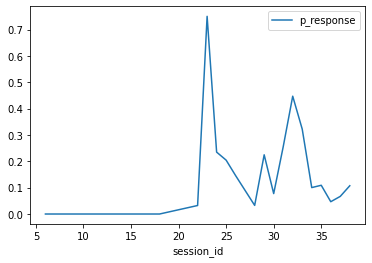

In [42]:
(df[(df.subject_id == 'W2405') & (df.s_audio == True)].groupby('session_id').agg(
    p_response=('response', 'mean')
)).plot()

In [38]:
df[(df.subject_id == 'W2372') & (df.s_audio == True)].agg(p_response=('response', 'mean'))

,response
p_response,0.427672



- **What values are each of the columns storing?**
- **What are the units?**
- **Does `time` refer to same clock as behavior and pupil data?**